In [1]:
import tensorflow as tf 
from tensorflow import keras

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.california_housing.load_data()

In [3]:
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[:5000], y_train_full[:5000]

In [4]:
input_deep = keras.layers.Input(shape=[6], name="input_deep")
input_wide = keras.layers.Input(shape=[5], name="input_wide")

norm_layer_wide = keras.layers.Normalization()
norm_layer_deep = keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)

#keras.layers.Concatenate() → Layer Class
#This is a layer object that you can instantiate and use in a functional or sequential model.
#Useful when you want to reuse the same layer multiple times or give it a name/axis parameter.

# keras.layers.concatenate() → Functional API Helper
# This is a functional shortcut, which directly applies concatenation without creating a separate layer object.
# It internally creates a Concatenate layer for you.

concat = keras.layers.concatenate([hidden2, norm_wide])

output = keras.layers.Dense(1)(concat)

In [55]:
    # few things to note:

# 1. Each Dense layer is created and called on the same line. This is a common practice, as it makes the code more concise without losing clarity. 
# However, we can’t do this with the Normalization layer since we need a reference to the layer to be able to call its adapt() method before fitting the model.

# We used tf.keras.layers.concatenate(), which creates a Concatenate layer and calls it with the given inputs

In [5]:
model = keras.Model(inputs = [input_wide, input_deep], outputs = [output])

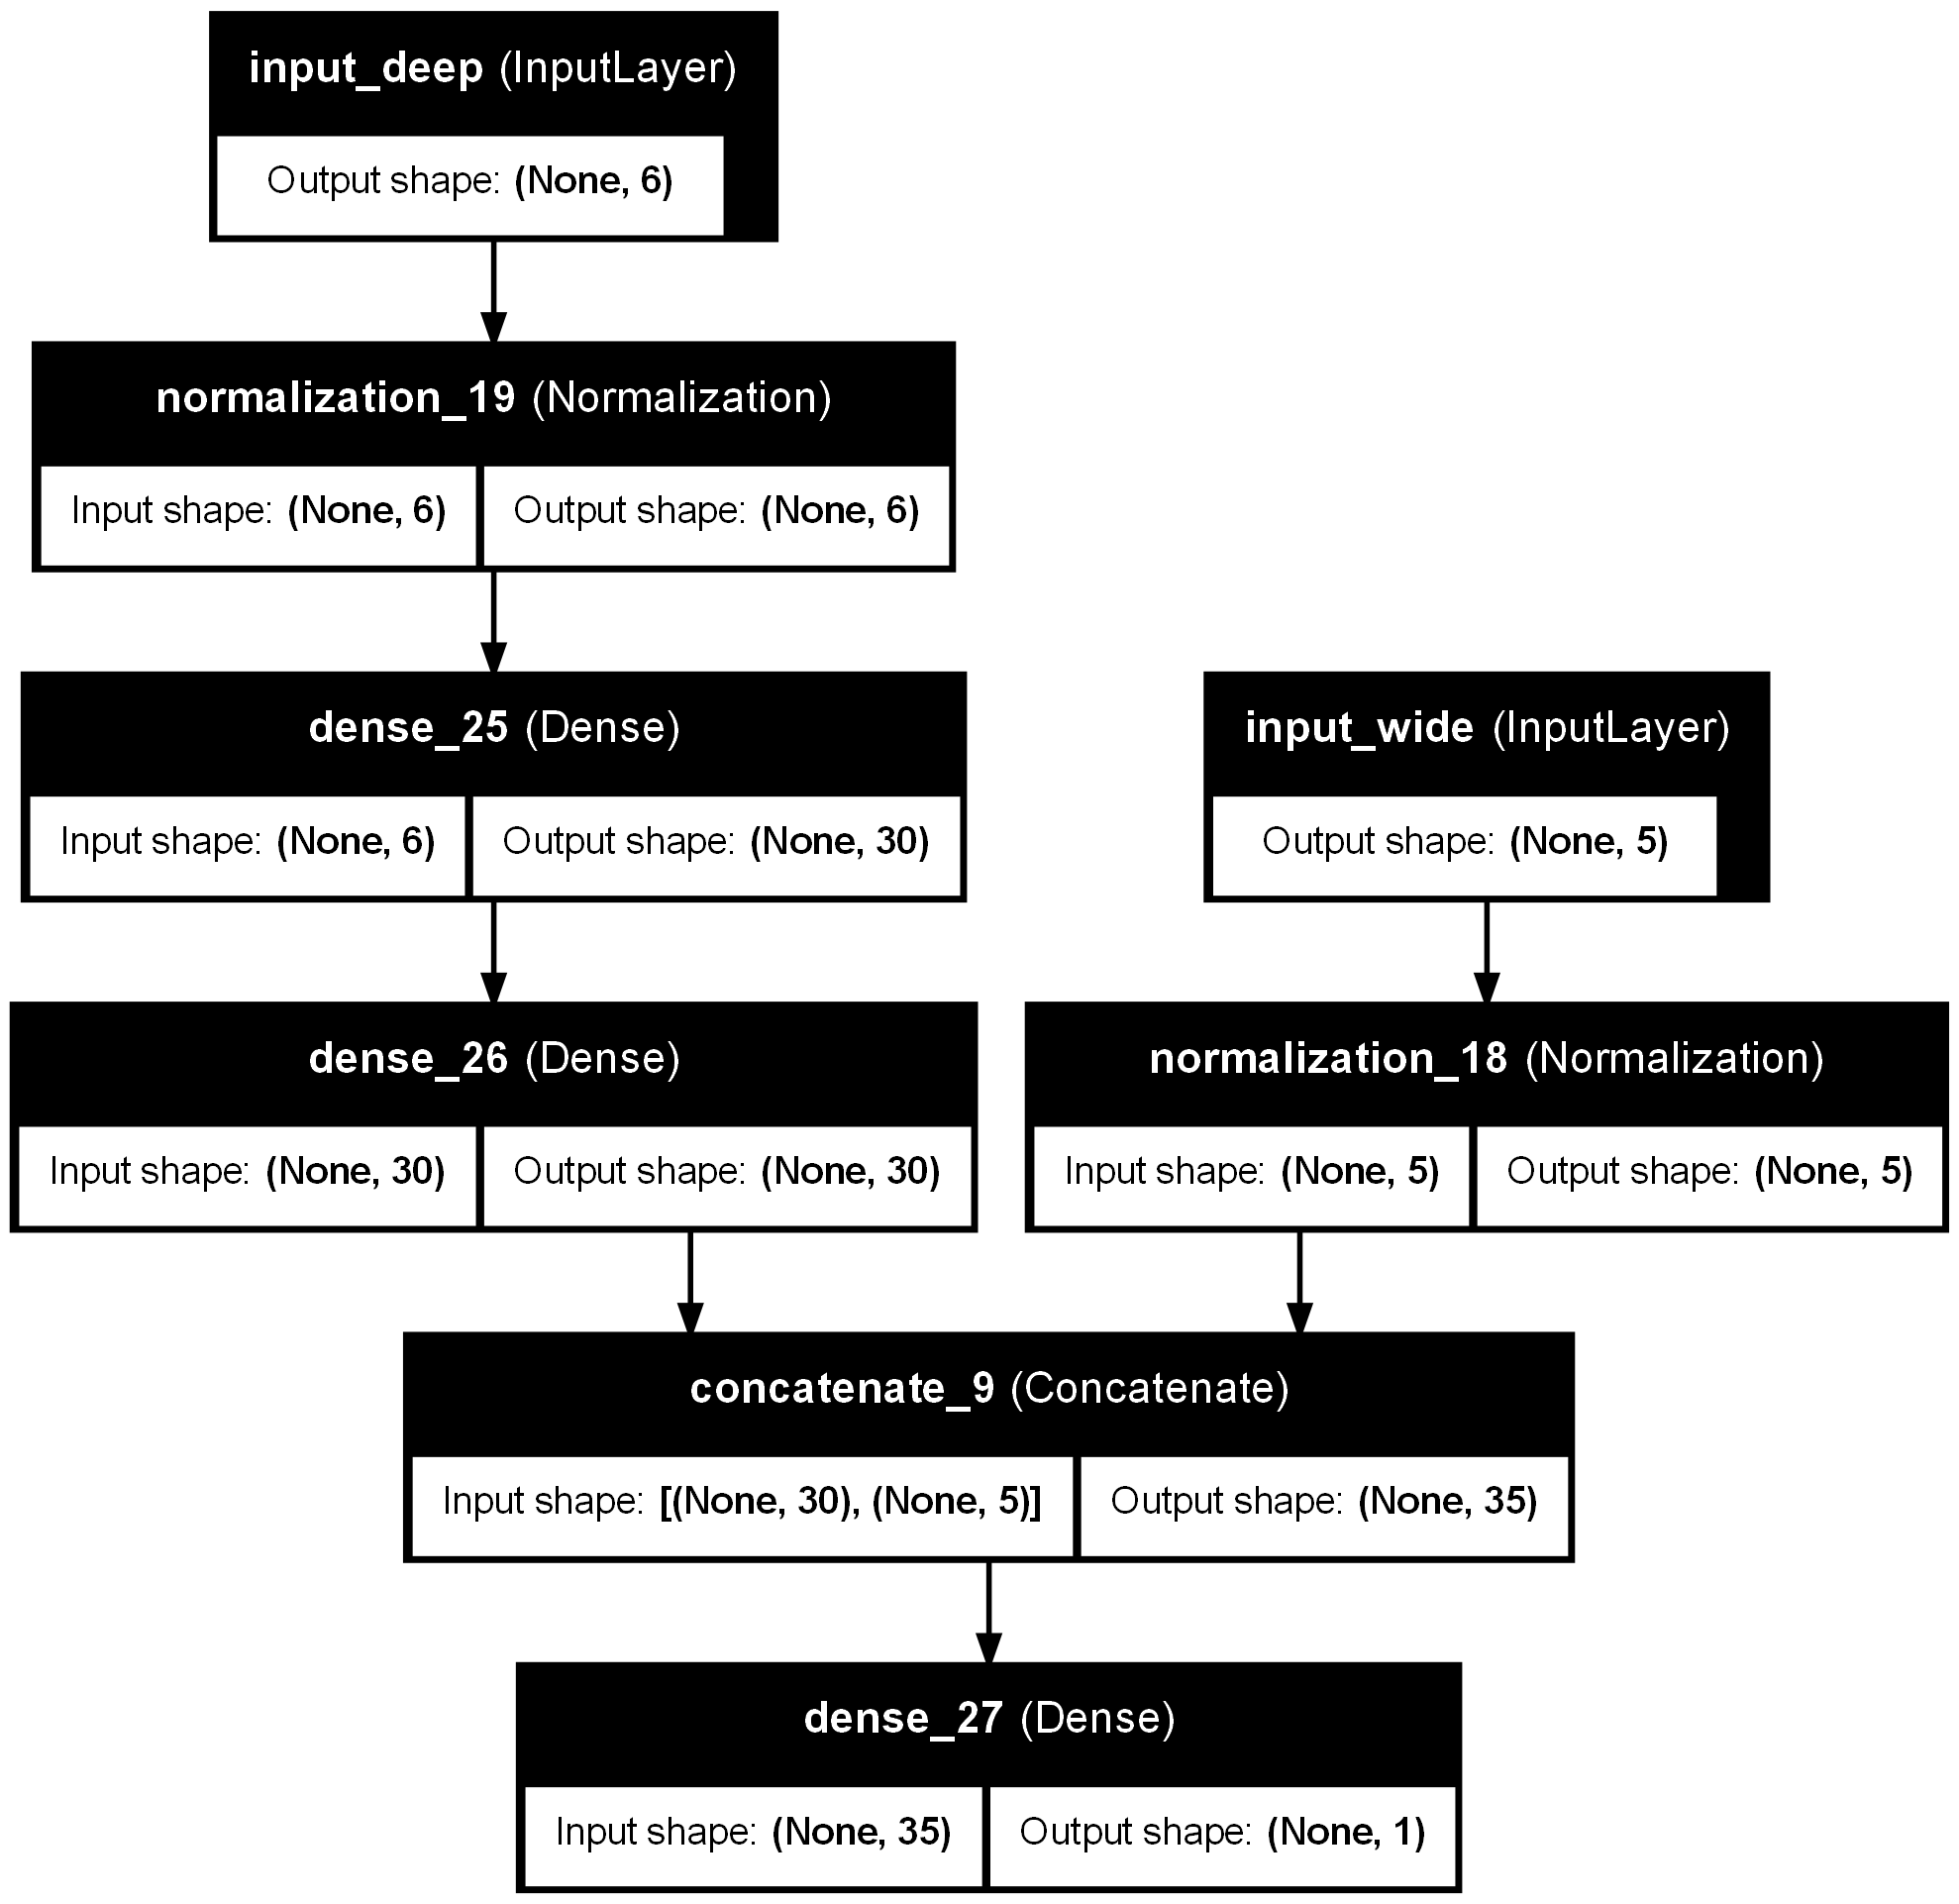

In [83]:
keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [57]:
optimizer = keras.optimizers.Adam(learning_rate = 1e-3)

In [58]:
model.compile(loss='mse', optimizer=optimizer, metrics=[keras.metrics.RootMeanSquaredError])

In [59]:
X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

In [60]:
norm_layer_deep.adapt(X_train_deep)
norm_layer_wide.adapt(X_train_wide)

In [62]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_deep          │ (None, 6)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_19    │ (None, 6)         │         13 │ input_deep[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 30)        │        210 │ normalization_19… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_wide          │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 30)        │        930 │ dense_25[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_18    │ (None, 5)         │         11 │ input_wide[0][0]  │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 35)        │          0 │ dense_26[0][0],   │
│ (Concatenate)       │                   │            │ normalization_18… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 1)         │         36 │ concatenate_9[0]… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,200 (4.70 KB)

 Trainable params: 1,176 (4.59 KB)

 Non-trainable params: 24 (104.00 B)

In [61]:
inputs_ = {"input_wide": X_train_wide, "input_deep": X_train_deep}

In [64]:
history = model.fit(inputs_, y_train, epochs=100, validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9540982784.0000 - root_mean_squared_error: 97653.6797 - val_loss: 9557539840.0000 - val_root_mean_squared_error: 97762.6719
Epoch 2/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9207281664.0000 - root_mean_squared_error: 95920.4297 - val_loss: 9142856704.0000 - val_root_mean_squared_error: 95618.2891
Epoch 3/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8695712768.0000 - root_mean_squared_error: 93227.1484 - val_loss: 8760398848.0000 - val_root_mean_squared_error: 93597.0000
Epoch 4/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8424715776.0000 - root_mean_squared_error: 91775.9766 - val_loss: 8407670272.0000 - val_root_mean_squared_error: 91693.3516
Epoch 5/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7808486912.0000 - root_mean_squared_error: 88337.7812 - val_loss: 8076606464.0000 - val_root_mean_squared_error: 89869.9453
Epoch 6/100
360/360 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7906141696.000

In [65]:
import matplotlib.pyplot as plt

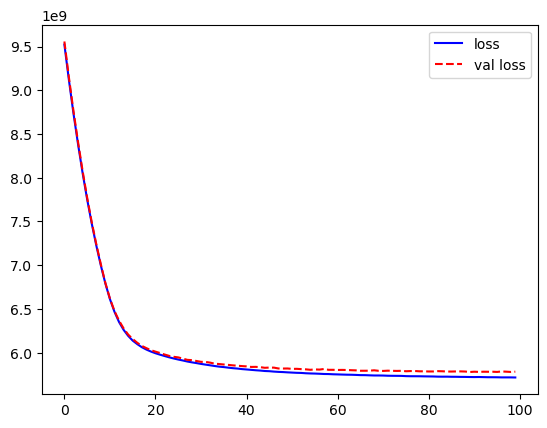

In [66]:
plt.plot(history.history["loss"], 'b-', label='loss')
plt.plot(history.history["val_loss"], 'r--', label='val loss')
plt.legend()
plt.show()

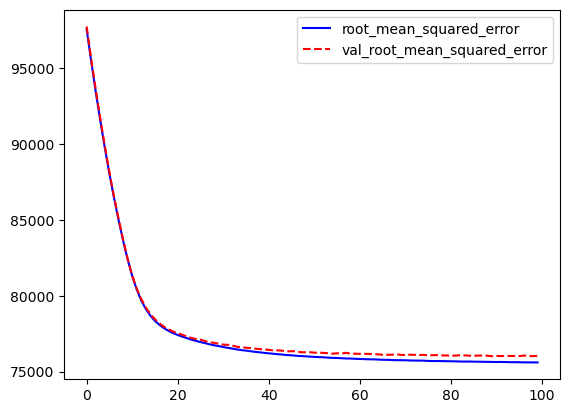

In [67]:
plt.plot(history.history["root_mean_squared_error"], 'b-', label='root_mean_squared_error')
plt.plot(history.history["val_root_mean_squared_error"], 'r--', label='val_root_mean_squared_error')
plt.legend()
plt.show()

In [77]:
model.evaluate((X_test_wide, X_test_deep), y_test, return_dict=True)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6040777728.0000 - root_mean_squared_error: 77692.0000 


{'loss': 5693076992.0, 'root_mean_squared_error': 75452.484375}

In [84]:
model.get_state_tree().keys()

dict_keys(['trainable_variables', 'non_trainable_variables', 'optimizer_variables', 'metrics_variables'])

In [82]:
model.get_state_tree()["trainable_variables"].keys()

dict_keys(['dense_25', 'dense_26', 'dense_27'])

In [85]:
model.get_state_tree()["non_trainable_variables"].keys()

dict_keys(['normalization_19', 'normalization_18'])

In [90]:
model.get_state_tree()["optimizer_variables"]['adam'].keys()

dict_keys(['iteration', 'learning_rate', 'dense_25_kernel_momentum', 'dense_25_kernel_velocity', 'dense_25_bias_momentum', 'dense_25_bias_velocity', 'dense_26_kernel_momentum', 'dense_26_kernel_velocity', 'dense_26_bias_momentum', 'dense_26_bias_velocity', 'dense_27_kernel_momentum', 'dense_27_kernel_velocity', 'dense_27_bias_momentum', 'dense_27_bias_velocity'])

In [ ]:
keras.models.